In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [24]:
concrete_data = pd.read_excel("Data/Concrete_Data.xls")
concrete_data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


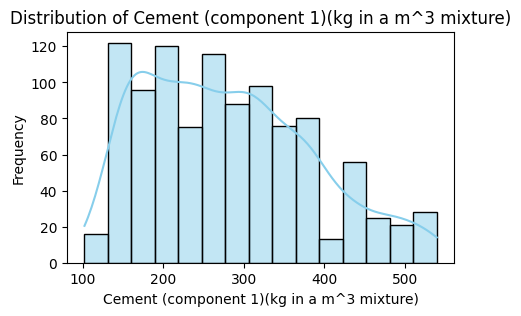

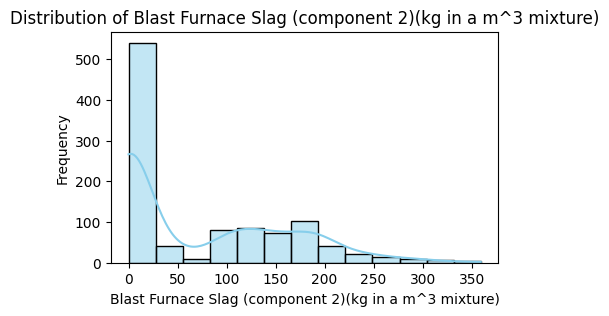

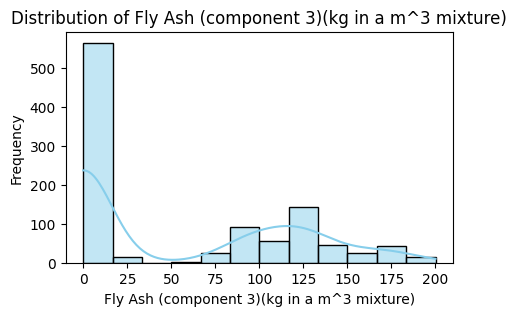

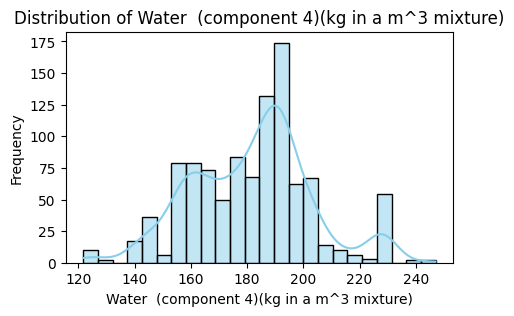

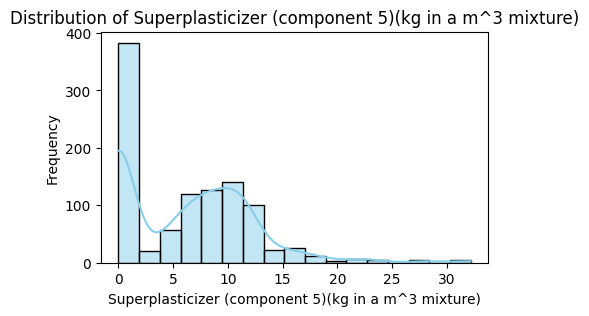

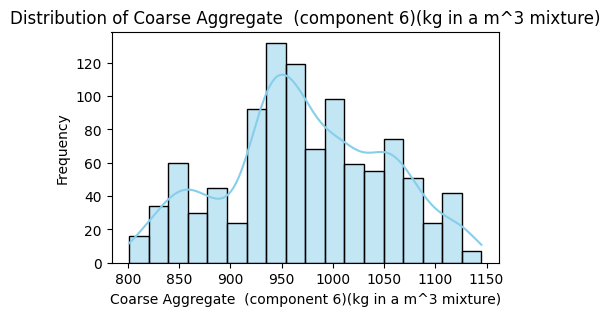

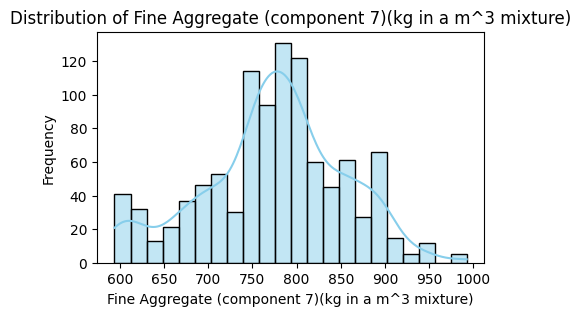

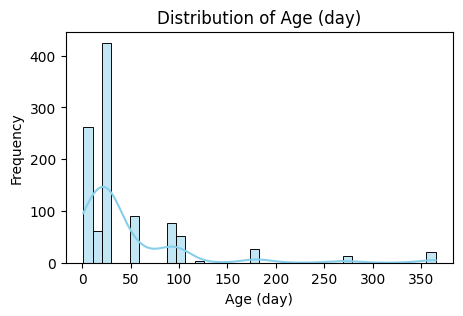

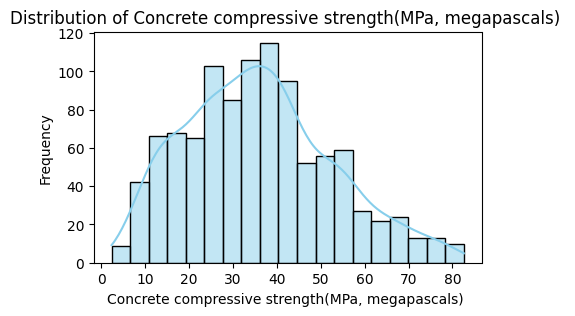

In [29]:
for column in concrete_data:
    plt.figure(figsize=(5, 3))
    plt.subplot(1, 1, 1)  # Only one subplot since you're plotting one variable per figure
    sns.histplot(concrete_data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

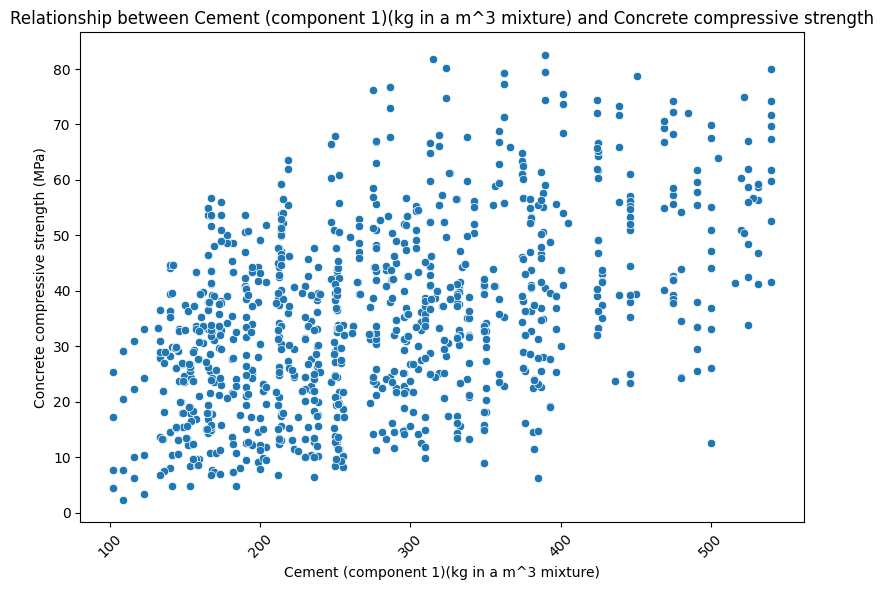

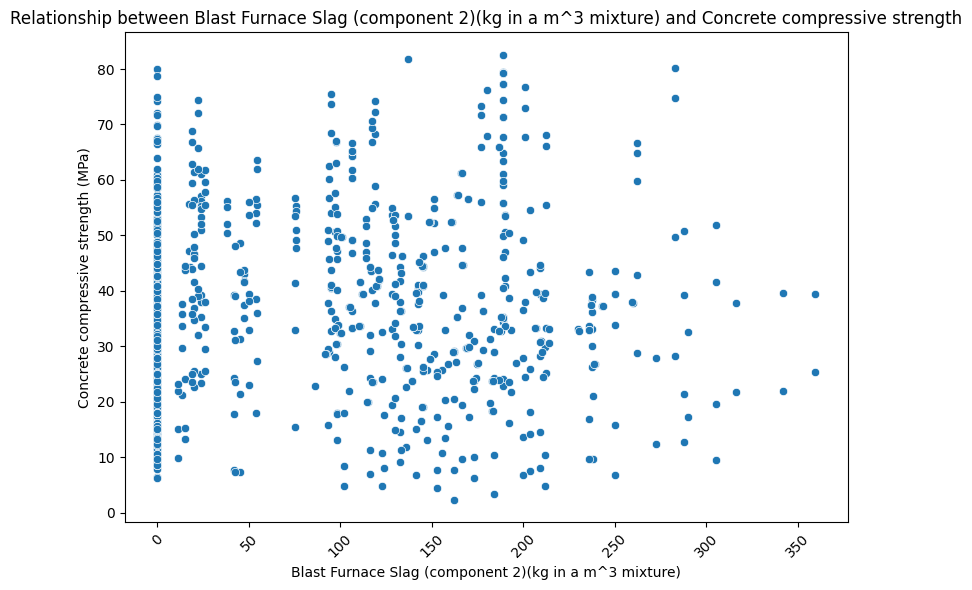

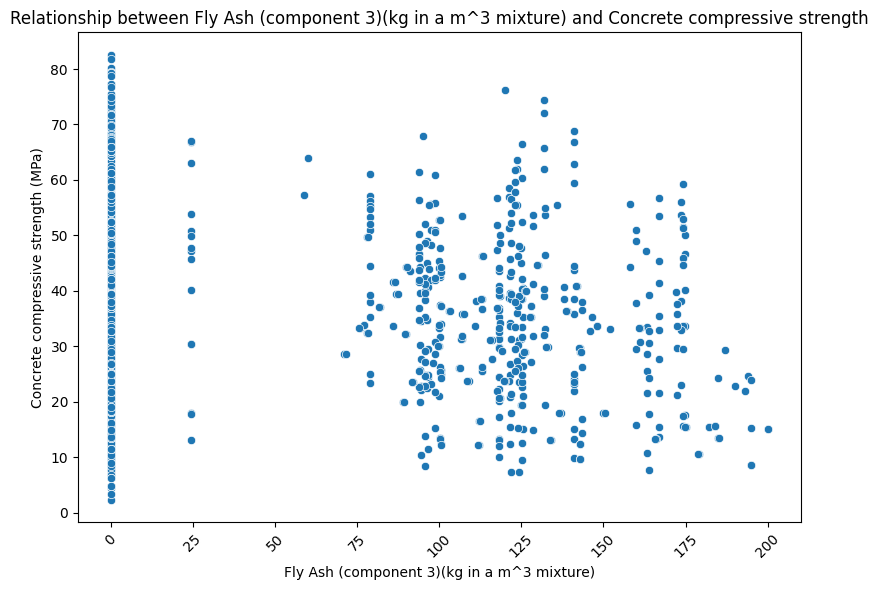

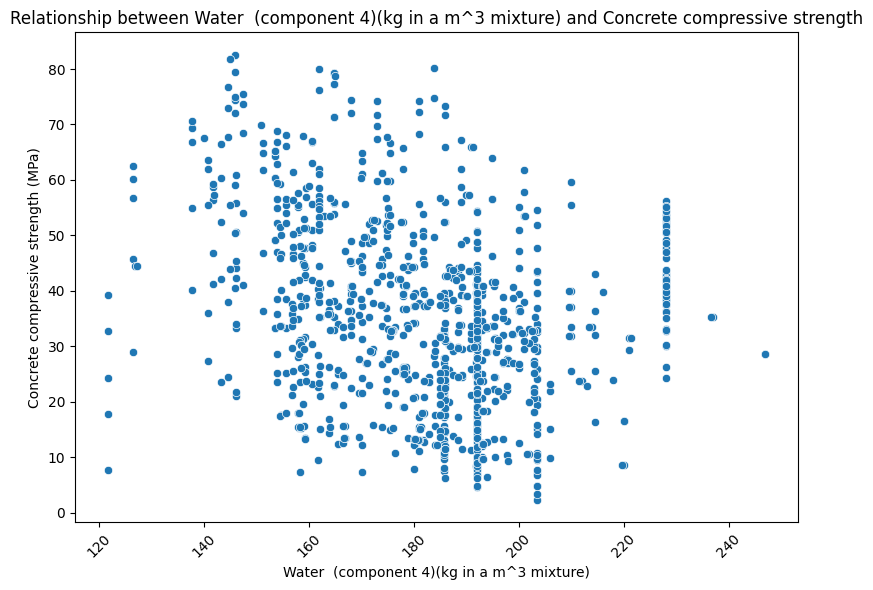

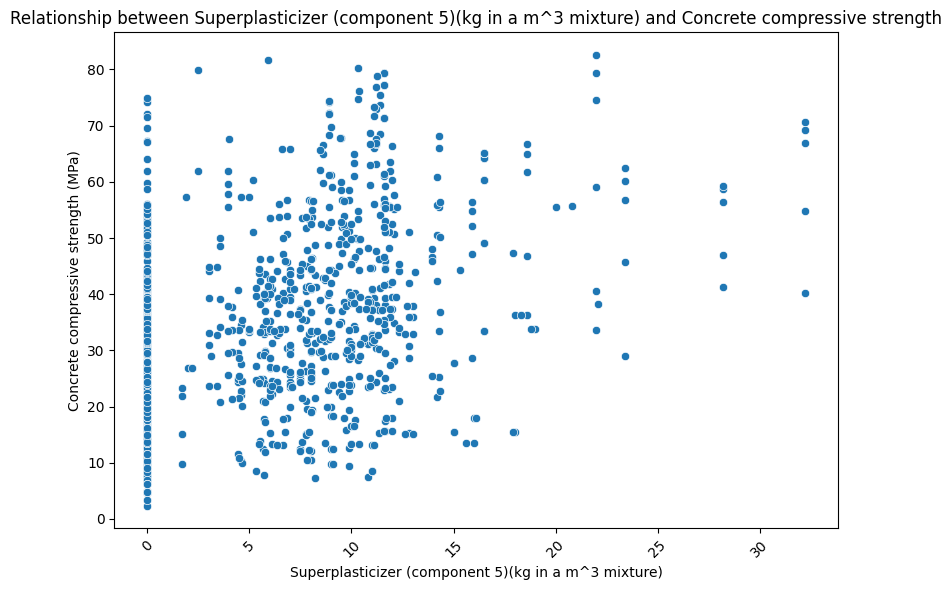

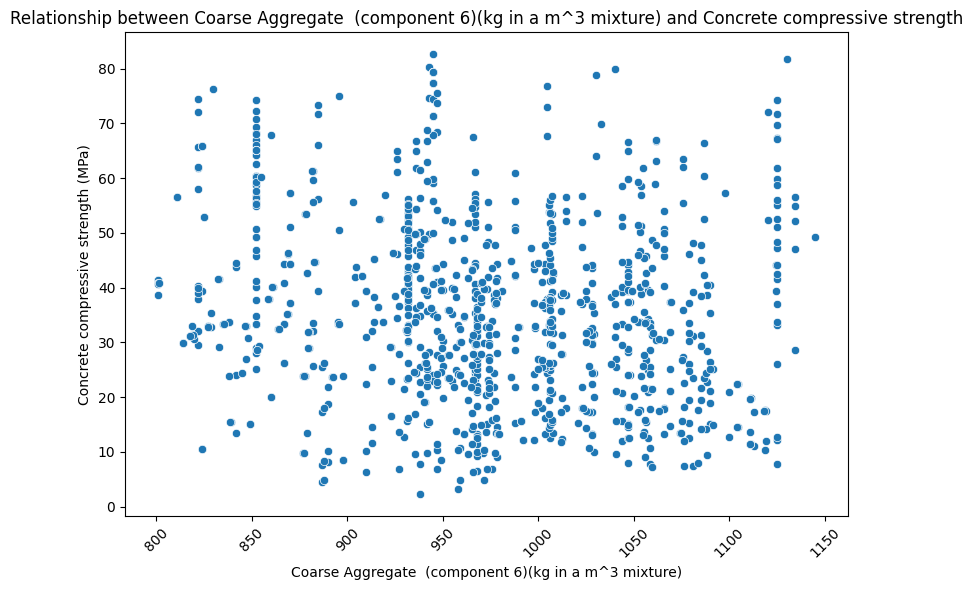

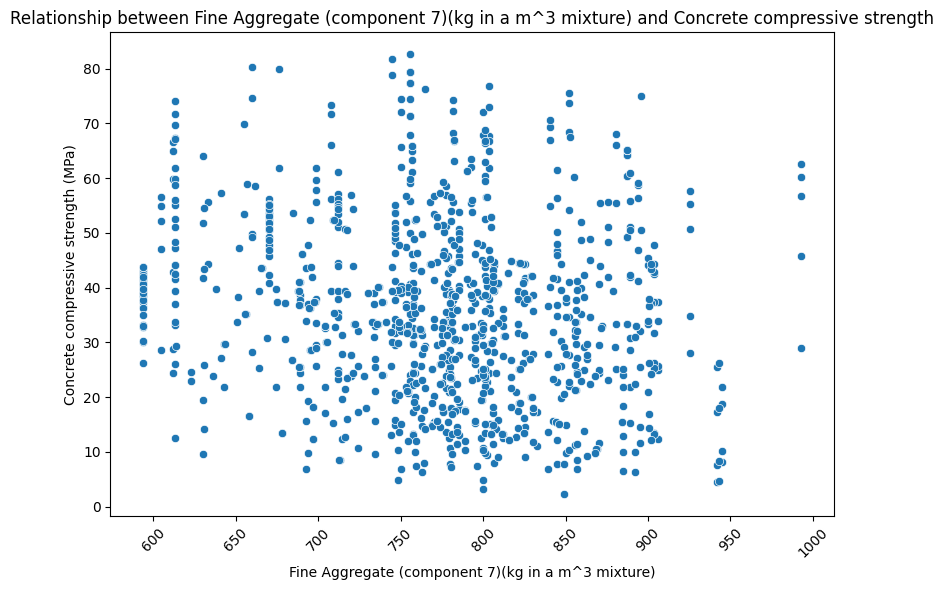

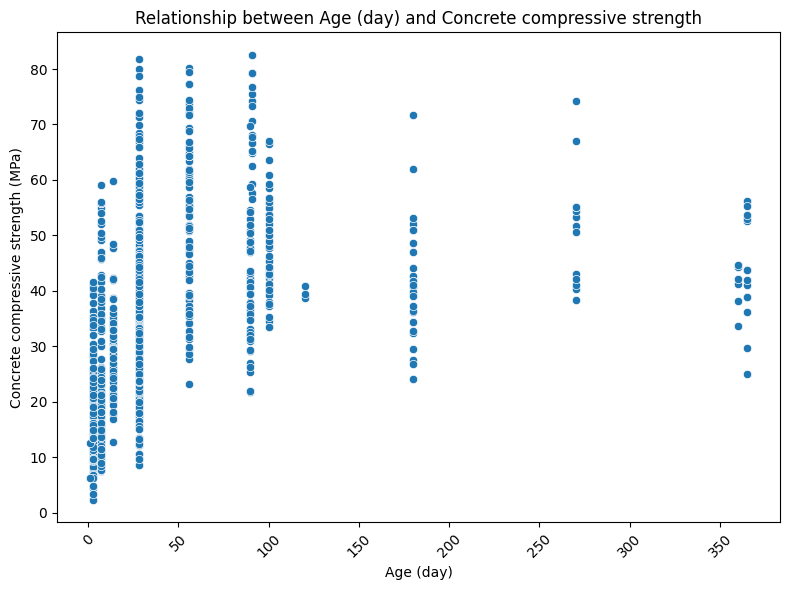

In [22]:
target_variable = concrete_data["Concrete compressive strength(MPa, megapascals) "]
for predictor_variable in concrete_data.columns:
    if predictor_variable != "Concrete compressive strength(MPa, megapascals) ":
        plt.figure(figsize=(8, 6))
        if concrete_data[predictor_variable].dtype != 'object':
            sns.scatterplot(x=predictor_variable, y=target_variable, data=concrete_data)
        else:
            sns.barplot(x=predictor_variable, y=target_variable, data=concrete_data, ci=None)
        plt.title(f'Relationship between {predictor_variable} and Concrete compressive strength')
        plt.xlabel(predictor_variable)
        plt.ylabel('Concrete compressive strength (MPa)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [35]:
correlations = {}

for predictor_variable in concrete_data.columns:
    if predictor_variable != "Concrete compressive strength(MPa, megapascals) ":
        correlation = round(concrete_data[predictor_variable].corr(concrete_data["Concrete compressive strength(MPa, megapascals) "]),2)
        correlations[predictor_variable] = correlation

for predictor_variable, correlation in correlations.items():
    print(f"Correlation between {predictor_variable} and Concrete compressive strength: {correlation}")

Correlation between Cement (component 1)(kg in a m^3 mixture) and Concrete compressive strength: 0.5
Correlation between Blast Furnace Slag (component 2)(kg in a m^3 mixture) and Concrete compressive strength: 0.13
Correlation between Fly Ash (component 3)(kg in a m^3 mixture) and Concrete compressive strength: -0.11
Correlation between Water  (component 4)(kg in a m^3 mixture) and Concrete compressive strength: -0.29
Correlation between Superplasticizer (component 5)(kg in a m^3 mixture) and Concrete compressive strength: 0.37
Correlation between Coarse Aggregate  (component 6)(kg in a m^3 mixture) and Concrete compressive strength: -0.16
Correlation between Fine Aggregate (component 7)(kg in a m^3 mixture) and Concrete compressive strength: -0.17
Correlation between Age (day) and Concrete compressive strength: 0.33


/Library/Python/3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


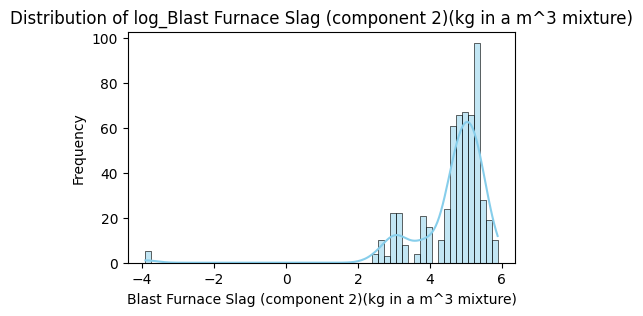

/Library/Python/3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


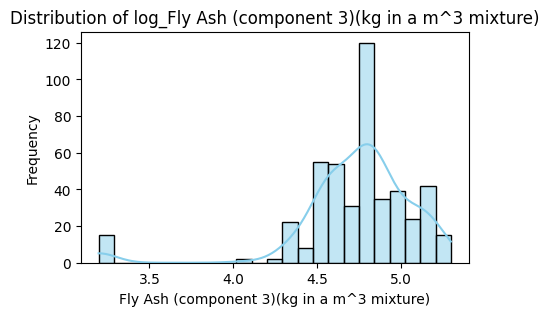

/Library/Python/3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


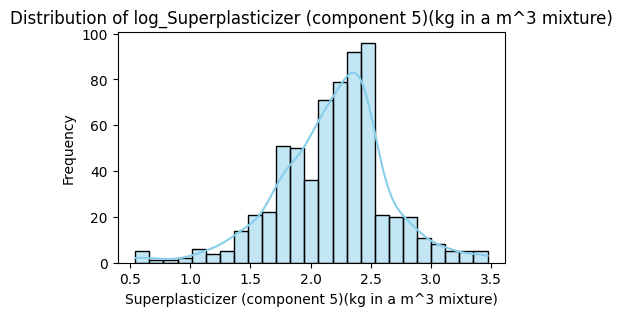

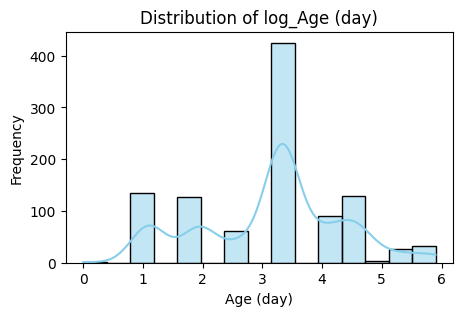

In [32]:
log_transform_list =["Blast Furnace Slag (component 2)(kg in a m^3 mixture)","Fly Ash (component 3)(kg in a m^3 mixture)","Superplasticizer (component 5)(kg in a m^3 mixture)","Age (day)"]
for column in log_transform_list:
    data = np.log(concrete_data[column])
    plt.figure(figsize=(5, 3))
    plt.subplot(1, 1, 1)  
    sns.histplot(data, kde=True, color='skyblue')
    plt.title(f'Distribution of log_{column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [50]:
import numpy as np

log_transform_list = ["Blast Furnace Slag (component 2)(kg in a m^3 mixture)",
                      "Fly Ash (component 3)(kg in a m^3 mixture)",
                      "Superplasticizer (component 5)(kg in a m^3 mixture)",
                      "Age (day)"]

epsilon = 1e-8  # small constant

for column in log_transform_list:
    data = np.log(concrete_data[column] + epsilon)
    correlation = round(data.corr(concrete_data["Concrete compressive strength(MPa, megapascals) "]),2)
    print(f"Correlation with Concrete compressive strength: {correlation}\n")


Correlation with Concrete compressive strength: 0.23

Correlation with Concrete compressive strength: -0.07

Correlation with Concrete compressive strength: 0.3

Correlation with Concrete compressive strength: 0.55

